<a href="https://colab.research.google.com/github/bmurdata/EDA-NYC-Open-Data/blob/main/EDANYCGov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of NYC Government Employees
### Titles, Unions, \#'s and more

## Introduction
   The City of New York employs hundreds of thousands of workers, ranging from cusodians, analysts, police officers, and more. These titles in turn are represented by many different unions. Using the Open Data Portal and Socrata API, we will attempt to learn more about this workforce.
   Datset can be found here: https://data.cityofnewyork.us/City-Government/NYC-Civil-Service-Titles/nzjr-3966

## Questions


1.   How many titles are there?
2.   How many unions are there?
3.   How many titles are in each union?



## Open Data API Portal
The Open Data Portal has free, public datasets related to NYC government. It makes its datasets available via the Socrata API. This is an API very similar to SQL.




Today, we will look at two of them and build visualizations using Python Seaborn library, using Pandas and other data visualization tools.

Install dependencies if needed

In [ ]:
!pip install seaborn
!pip install requests

In [ ]:
import requests as req
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Get our data from the NYC Open Data Portal site, and see the keys we can use to sort it

url="https://data.cityofnewyork.us/resource/nzjr-3966.json"
offset="?$offset="
myData=pd.read_json(url)
for i in range(1,5):
  myData=myData.append(pd.read_json(url+offset+str(i)+"000"))


print(myData.keys())
print(len(myData))
print(myData.iloc[[0,-1]])
# myData=req.get(url)
# jsonData=myData.json()
# jsonData[0]
# print(type(jsonData))

Index(['title', 'descr', 'std_hrs', 'asg_lvl', 'union_cd', 'union_descr',
       'barg_unit', 'barg_descr', 'min_rate', 'max_rate'],
      dtype='object')
3023
    title                           descr  ...  min_rate max_rate
0   00031                           HCPPA  ...   42451.0  79294.0
22  9POLL  ELECTION WORKER (PART-TIME)-BD  ...       1.0      1.0

[2 rows x 10 columns]


In [ ]:
# Overall totals
print("There are :"+ str(len(myData.barg_descr.value_counts()))+" unions representing 3023 titles")
print("There are :"+ str(len(myData.descr.value_counts()))+" titles with the same description out of 3023 titles")

There are :44 unions representing 3023 titles
There are :2105 titles with the same description out of 3023 titles


EXECUTIVE PROGRAM SPECIALIST (    22
INVESTIGATOR (EMPLOYEE DISCIPL    21
STRATEGIC INITIATIVE SPECIALIS    20
CONFIDENTIAL STRATEGY PLANNER     14
EXECUTIVE ASSISTANT TO THE COM    12
Name: descr, dtype: int64


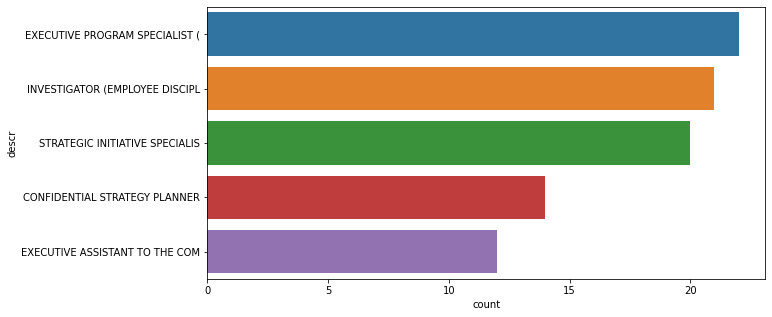

In [ ]:
# Top 5 title descriptions

# Shows how we can manipulate the data
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
print(myData.descr.value_counts().iloc[:5])
plot=sns.countplot(y=myData.descr,order=myData.descr.value_counts().iloc[:5].index,ax=ax) #hue=myData.barg_descr

plt.show()


Non-Union                         1502
District Council 37                839
Intl Brotherhood of Teamsters      137
Communication Wrkrs of America      85
Service Employees Int'l Union       83
Name: barg_descr, dtype: int64


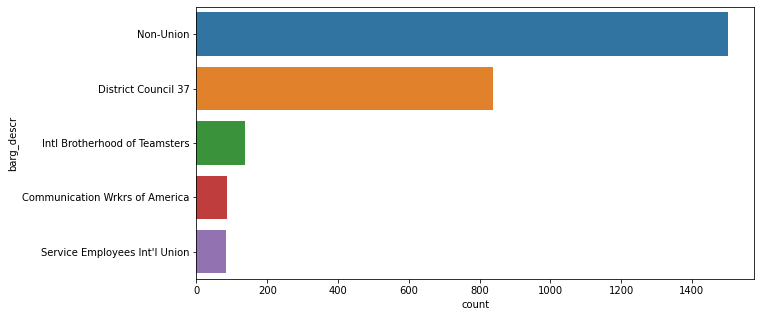

In [ ]:
# Top five unions

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
print(myData.barg_descr.value_counts().iloc[:5])
sns.countplot(y=myData.barg_descr,order=myData.barg_descr.value_counts().iloc[:5].index,ax=ax) #hue=myData.barg_descr
plt.show()


In [ ]:
myData.descr.value_counts()

EXECUTIVE PROGRAM SPECIALIST (    22
INVESTIGATOR (EMPLOYEE DISCIPL    21
STRATEGIC INITIATIVE SPECIALIS    20
CONFIDENTIAL STRATEGY PLANNER     14
EXECUTIVE ASSISTANT TO THE COM    12
                                  ..
DIRECTOR OF PERSONNEL (HA)         1
PRINCIPAL TITLE EXAMINER           1
SUPERVISOR DOCKBUILDER             1
DIRECTOR OF THE CITY RECORD (D     1
ADMINISTRATIVE SPACE ANALYST (     1
Name: descr, Length: 2105, dtype: int64

In [ ]:
# Totals list
myData.barg_descr.value_counts()

Non-Union                         1502
District Council 37                839
Intl Brotherhood of Teamsters      137
Communication Wrkrs of America      85
Service Employees Int'l Union       83
Intl Union ofOpertg Engineers       60
Organization of Staff Analysts      45
Doctors Council Clinicians          39
United Federation of Teachers       30
Intl Brthd of Electrical Wrkrs      30
New York State Nurses Assoc         21
Marine EngineersBeneficialAssn      10
Captains Endowment Association       9
Patrolmen's Bnvlnt Assoc of DA       9
Alliance ofTheatrical&StageEEs       9
District Council 9                   8
Probation Officer United Assoc       8
United Marine Division-L333ILA       8
UnitedBrthd of Crptrs&Joiners        8
Nat'l U/Hospital&Healthcare EE       7
Uniformed Fire Officers Assoc        7
Plumbers                             7
Pavers & Road Builders DC            6
Lodge 5                              5
SEIU / DC37                          4
NYC Deputy Sheriffs Assoc